<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_3_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.2_n250.csv',
 'data_add_delta_-3.2_n120.csv',
 'data_add_delta_-3.2_n60.csv',
 'data_add_delta_-3.2_n30.csv',
 'data_add_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.660625,90.113562,79.941845,-0.000132,269.715900,269.716485,-0.000585
1,0.0,1.0,71.623673,79.644685,37.003405,0.001127,198.272890,198.272241,0.000649
2,0.0,2.0,90.838931,65.841881,97.558815,0.002181,264.241808,264.239448,0.002360
3,0.0,3.0,74.868358,20.637430,39.446241,-0.007962,144.944067,144.951243,-0.007176
4,0.0,4.0,25.214536,26.856865,36.142190,0.000491,98.214081,98.212843,0.001238
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.420163,31.424788,59.607668,0.000449,135.453067,135.450464,0.002603
19996,999.0,16.0,51.948962,50.351410,85.476459,0.001589,197.778421,197.776044,0.002377
19997,999.0,17.0,74.793336,70.430191,31.944503,0.000391,187.168421,187.167100,0.001322
19998,999.0,18.0,71.204079,99.865745,98.108290,0.000453,279.178566,279.179645,-0.001079


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.660625,90.113562,79.941845,-0.000132,269.715900,269.716485,-0.000585
1,0.0,1.0,71.623673,79.644685,37.003405,0.001127,198.272890,198.272241,0.000649
2,0.0,2.0,90.838931,65.841881,97.558815,0.002181,264.241808,264.239448,0.002360
3,0.0,3.0,74.868358,20.637430,39.446241,-0.007962,144.944067,144.951243,-0.007176
4,0.0,4.0,25.214536,26.856865,36.142190,0.000491,98.214081,98.212843,0.001238
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.420163,31.424788,59.607668,0.000449,135.453067,135.450464,0.002603
19996,999.0,16.0,51.948962,50.351410,85.476459,0.001589,197.778421,197.776044,0.002377
19997,999.0,17.0,74.793336,70.430191,31.944503,0.000391,187.168421,187.167100,0.001322
19998,999.0,18.0,71.204079,99.865745,98.108290,0.000453,279.178566,279.179645,-0.001079


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    89.660625  90.113562  79.941845 -0.000132  269.715900   
      1.0    71.623673  79.644685  37.003405  0.001127  198.272890   
      2.0    90.838931  65.841881  97.558815  0.002181  264.241808   
      3.0    74.868358  20.637430  39.446241 -0.007962  144.944067   
      4.0    25.214536  26.856865  36.142190  0.000491   98.214081   
...                ...        ...        ...       ...         ...   
999.0 15.0   34.420163  31.424788  59.607668  0.000449  135.453067   
      16.0   51.948962  50.351410  85.476459  0.001589  197.778421   
      17.0   74.793336  70.430191  31.944503  0.000391  187.168421   
      18.0   71.204079  99.865745  98.108290  0.000453  279.178566   
      19.0   38.635238  94.344361  22.560534 -0.000369  165.539764   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    269.716485 -0.000585  
      1.0    198.272241  0.000649  
      2.0    264.239448  0.002360  
      3.0    144.951243 -0.007176  
      4.0     98.212843  0.001238  
...                 ...       ...  
999.0 15.0   135.450464  0.002603  
      16.0   197.776044  0.002377  
      17.0   187.167100  0.001322  
      18.0   279.179645 -0.001079  
      19.0   165.539747  0.000017  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    89.660625  90.113562  79.941845 -0.000132  269.715900   
      1.0    71.623673  79.644685  37.003405  0.001127  198.272890   
      2.0    90.838931  65.841881  97.558815  0.002181  264.241808   
      3.0    74.868358  20.637430  39.446241 -0.007962  144.944067   
      4.0    25.214536  26.856865  36.142190  0.000491   98.214081   
...                ...        ...        ...       ...         ...   
999.0 15.0   34.420163  31.424788  59.607668  0.000449  135.453067   
      16.0   51.948962  50.351410  85.476459  0.001589  197.778421   
      17.0   74.793336  70.430191  31.944503  0.000391  187.168421   
      18.0   71.204079  99.865745  98.108290  0.000453  279.178566   
      19.0   38.635238  94.344361  22.560534 -0.000369  165.539764   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    269.716485 -0.000585  
      1.0    198.272241  0.000649  
      2.0    264.239448  0.002360  
      3.0    144.951243 -0.007176  
      4.0     98.212843  0.001238  
...                 ...       ...  
999.0 15.0   135.450464  0.002603  
      16.0   197.776044  0.002377  
      17.0   187.167100  0.001322  
      18.0   279.179645 -0.001079  
      19.0   165.539747  0.000017  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.660625,90.113562,79.941845,-0.000132,269.715900,269.716485,-0.000585
1,0.0,1.0,71.623673,79.644685,37.003405,0.001127,198.272890,198.272241,0.000649
2,0.0,2.0,90.838931,65.841881,97.558815,0.002181,264.241808,264.239448,0.002360
3,0.0,3.0,74.868358,20.637430,39.446241,-0.007962,144.944067,144.951243,-0.007176
4,0.0,4.0,25.214536,26.856865,36.142190,0.000491,98.214081,98.212843,0.001238
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.420163,31.424788,59.607668,0.000449,135.453067,135.450464,0.002603
19996,999.0,16.0,51.948962,50.351410,85.476459,0.001589,197.778421,197.776044,0.002377
19997,999.0,17.0,74.793336,70.430191,31.944503,0.000391,187.168421,187.167100,0.001322
19998,999.0,18.0,71.204079,99.865745,98.108290,0.000453,279.178566,279.179645,-0.001079


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    89.660625  90.113562  79.941845 -0.000132  269.715900   
      1.0    71.623673  79.644685  37.003405  0.001127  198.272890   
      2.0    90.838931  65.841881  97.558815  0.002181  264.241808   
      3.0    74.868358  20.637430  39.446241 -0.007962  144.944067   
      4.0    25.214536  26.856865  36.142190  0.000491   98.214081   
...                ...        ...        ...       ...         ...   
999.0 15.0   34.420163  31.424788  59.607668  0.000449  135.453067   
      16.0   51.948962  50.351410  85.476459  0.001589  197.778421   
      17.0   74.793336  70.430191  31.944503  0.000391  187.168421   
      18.0   71.204079  99.865745  98.108290  0.000453  279.178566   
      19.0   38.635238  94.344361  22.560534 -0.000369  165.539764   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    269.716485 -0.000585  
      1.0    198.272241  0.000649  
      2.0    264.239448  0.002360  
      3.0    144.951243 -0.007176  
      4.0     98.212843  0.001238  
...                 ...       ...  
999.0 15.0   135.450464  0.002603  
      16.0   197.776044  0.002377  
      17.0   187.167100  0.001322  
      18.0   279.179645 -0.001079  
      19.0   165.539747  0.000017  

[20000 rows x 7 columns]

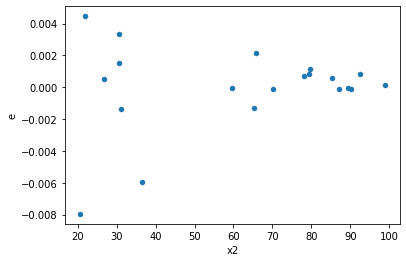

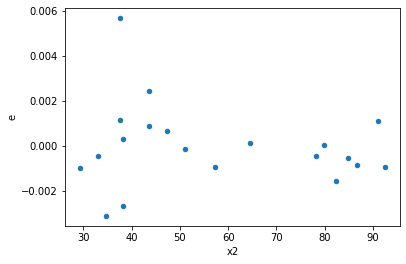

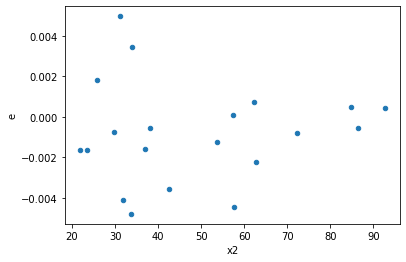

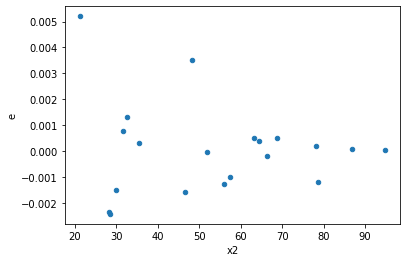

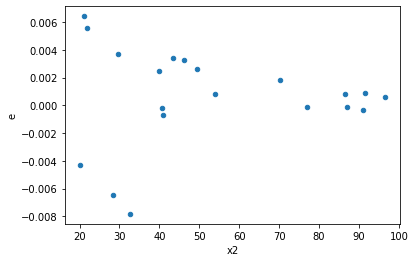

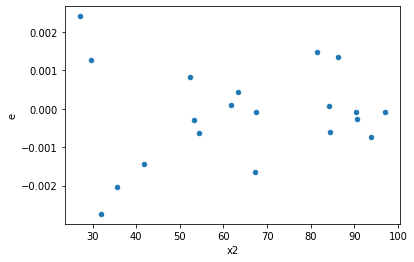

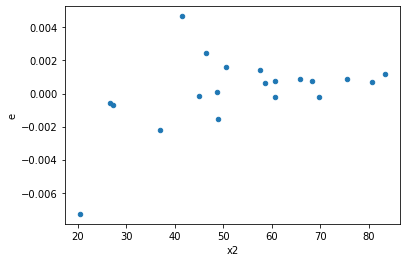

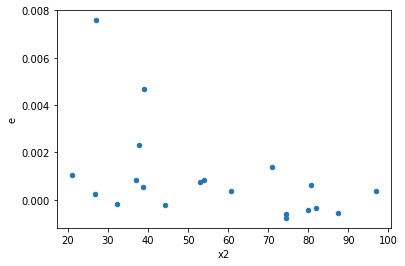

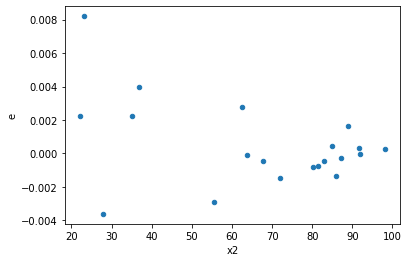

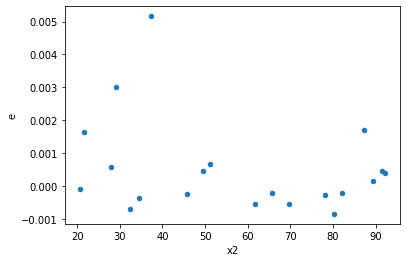

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,5.0,5.0,2.7104578743497963e-05,3.1212099074854364e-05,5.4209157486995925e-06,6.242419814970873e-06,1.1515434115478274,0.8807226481133119,0.559638675943344,0.44036132405665596,Reject005=1 : Homoscedasticity
16.0,5.0,5.0,1.9001783997477303e-06,1.0634801700260093e-05,3.8003567994954607e-07,2.1269603400520187e-06,5.5967385492183155,0.08189585505032149,0.9590520724748393,0.04094792752516074,Reject005=1 : Homoscedasticity
31.0,5.0,5.0,5.400547905157817e-06,1.0883843759077932e-05,1.0801095810315634e-06,2.1767687518155863e-06,2.0153221395709258,0.46021221044290184,0.7698938947785491,0.23010610522145092,Reject005=1 : Homoscedasticity
33.0,5.0,5.0,5.6896759403225886e-06,8.6959455507031e-06,1.1379351880645178e-06,1.7391891101406199e-06,1.5283727301717052,0.652924653212285,0.6735376733938575,0.3264623266061425,Reject005=1 : Homoscedasticity
55.0,5.0,5.0,3.4368815963895354e-06,1.5558706732611058e-05,6.873763192779071e-07,3.1117413465222115e-06,4.526983632184353,0.12302012628201875,0.9384899368589906,0.061510063141009375,Reject005=1 : Homoscedasticity
68.0,5.0,5.0,1.0447412679516885e-05,3.483293491840121e-05,2.089482535903377e-06,6.966586983680241e-06,3.334120704037506,0.21233303744371756,0.8938334812781412,0.10616651872185878,Reject005=1 : Homoscedasticity
73.0,5.0,5.0,4.3788071458367604e-06,8.452544305123971e-06,8.757614291673521e-07,1.6905088610247941e-06,1.9303303442263717,0.48777137534250503,0.7561143123287475,0.24388568767125252,Reject005=1 : Homoscedasticity
80.0,5.0,5.0,1.0503214682256365e-05,1.3843815719210621e-05,2.100642936451273e-06,2.7687631438421243e-06,1.3180551038909745,0.7692552753987902,0.6153723623006049,0.3846276376993951,Reject005=1 : Homoscedasticity
83.0,5.0,5.0,7.659384563875799e-06,1.178337463033337e-05,1.5318769127751599e-06,2.356674926066674e-06,1.5384231633841283,0.6479573469924422,0.6760213265037789,0.3239786734962211,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,9.487579292302341e-05,1.6961067930969083e-06,1.8975158584604684e-05,3.3922135861938166e-07,0.01787712904252646,0.0004358259753573606,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,5.184212343064355e-05,3.0238558998433278e-06,1.036842468612871e-05,6.047711799686656e-07,0.05832816442962184,0.007295152810613461,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,2.7104578743497963e-05,3.1212099074854364e-05,5.4209157486995925e-06,6.242419814970873e-06,1.1515434115478274,0.8807226481133119,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,2.8850822851465083e-05,1.7853187323638935e-06,5.770164570293017e-06,3.5706374647277867e-07,0.06188103339566387,0.008357253620604355,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,0.00014294612248961228,7.3759321592505365e-06,2.8589224497922456e-05,1.4751864318501073e-06,0.05159938605390669,0.005492775308443458,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,1.308918046961855e-05,2.7090221066812645e-06,2.61783609392371e-06,5.418044213362529e-07,0.2069665181077767,0.10881899147396198,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,2.574037073304422e-05,3.0915643732431205e-06,5.148074146608844e-06,6.183128746486241e-07,0.12010566612680224,0.03630619106089859,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,1.0914419530548375e-05,9.819258030224058e-06,2.1828839061096753e-06,1.9638516060448114e-06,0.8996592079625425,0.9104543127511194,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,4.91686868371394e-05,3.333286843550455e-06,9.833737367427881e-06,6.666573687100911e-07,0.06779287912632778,0.01029368656112409,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      569
Reject005=0 : Heteroscedasticity    431
Name: Result_test, dtype: int64